In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import dask
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:107: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


### Load datasets

In [2]:
budgFw = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_fw.nc').budg_fw
budgH = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_heat.nc').budg_heat

In [3]:
budgFw = budgFw.sel(time=slice('1993-01-01','2015-12-31'))
budgH = budgH.sel(time=slice('1993-01-01','2015-12-31'))

In [4]:
dif_ConvFw = budgFw.sel(term='tendFw')[:,:-1] - budgFw.sel(term='totalFw')[:,:-1]

### Plot

In [5]:
budgH_clim = budgH.groupby('time.month').mean('time')*1e-15
budgFw_clim = budgFw.groupby('time.month').mean('time')*1e3
dif_ConvFw_clim = dif_ConvFw.groupby('time.month').mean('time')*1e3

In [6]:
import calendar

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


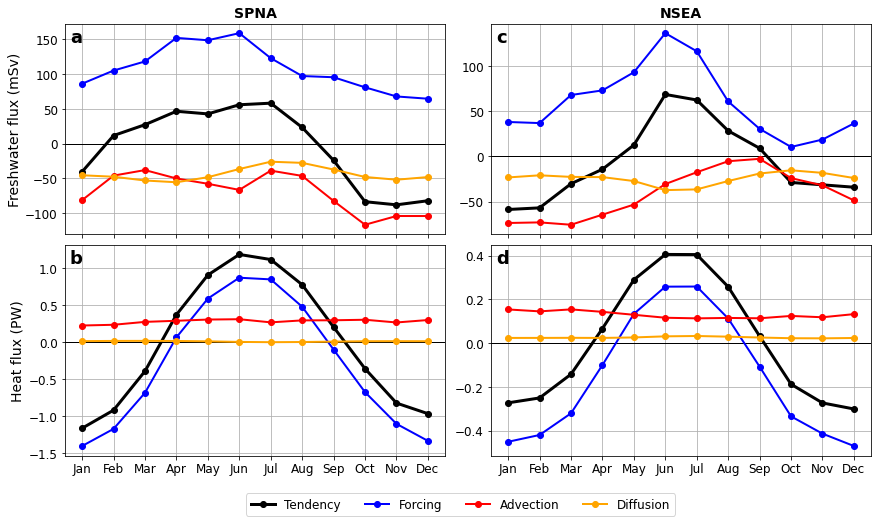

In [7]:
fig, axs = plt.subplots(2, 2,sharex=True, figsize=(14, 8))

axs[0,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
budgFw_clim.sel(region='spna',term='tendFw').plot(ax=axs[0,0],lw=3, color='k', marker='.',ms=12,label='Tendency')
budgFw_clim.sel(region='spna',term='forcFw').plot(ax=axs[0,0],lw=2, color='b', marker='.',ms=12,label='Forcing')
budgFw_clim.sel(region='spna',term='adv_ConvFw').plot(ax=axs[0,0],lw=2, color='r', marker='.',ms=12,label='Advection')
dif_ConvFw_clim.sel(region='spna').plot(ax=axs[0,0],lw=2, color='orange', marker='.',ms=12,label='Diffusion')
axs[0,0].set_ylabel(r'Freshwater flux (mSv)',fontsize=14)
axs[0,0].set_xlabel('')
axs[0,0].set_xticks(np.arange(1,13))
axs[0,0].text(0.013,0.91, 'a', fontsize=18, fontweight='bold', transform=axs[0,0].transAxes)
axs[0,0].tick_params(axis='both', which='major', labelsize=12)
axs[0,0].set_title(r'SPNA', fontsize=14, fontweight='bold')
axs[0,0].grid(True)

axs[1,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
budgH_clim.sel(region='spna',term='tendH').plot(ax=axs[1,0],lw=3,color='k',marker='.',ms=12,label='Tendency')
budgH_clim.sel(region='spna',term='forcH').plot(ax=axs[1,0],lw=2,color='b',marker='.',ms=12,label='Forcing')
budgH_clim.sel(region='spna',term='adv_ConvH').plot(ax=axs[1,0],lw=2,color='r',marker='.',ms=12,label='Advection')
budgH_clim.sel(region='spna',term='dif_ConvH').plot(ax=axs[1,0],lw=2,color='orange',marker='.',ms=12,label='Diffusion')
axs[1,0].set_ylabel(r'Heat flux (PW)', fontsize=14)
axs[1,0].set_xticklabels(calendar.month_abbr[1:13])
axs[1,0].set_xlabel('')
axs[1,0].text(0.013,0.91, 'b', fontsize=18, fontweight='bold', transform=axs[1,0].transAxes)
axs[1,0].tick_params(axis='both', which='major', labelsize=12)
axs[1,0].set_title('')
axs[1,0].grid(True)

axs[0,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
budgFw_clim.sel(region='nsea',term='tendFw').plot(ax=axs[0,1],lw=3,color='k',marker='.',ms=12,label='Tendency')
budgFw_clim.sel(region='nsea',term='forcFw').plot(ax=axs[0,1],lw=2,color='b',marker='.',ms=12,label='Forcing')
budgFw_clim.sel(region='nsea',term='adv_ConvFw').plot(ax=axs[0,1],lw=2,color='r',marker='.',ms=12,label='Advection')
dif_ConvFw_clim.sel(region='nsea').plot(ax=axs[0,1],lw=2, color='orange',marker='.',ms=12,label='Diffusion')
axs[0,1].set_ylabel('')
axs[0,1].set_xlabel('')
axs[0,1].set_xticks(np.arange(1,13))
axs[0,1].text(0.013,0.91, 'c', fontsize=18, fontweight='bold', transform=axs[0,1].transAxes)
axs[0,1].tick_params(axis='both', which='major', labelsize=12)
axs[0,1].set_title(r'NSEA', fontsize=14, fontweight='bold')
axs[0,1].grid(True)

axs[1,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
budgH_clim.sel(region='nsea',term='tendH').plot(ax=axs[1,1],lw=3, color='k', marker='.',ms=12,label='Tendency')
budgH_clim.sel(region='nsea',term='forcH').plot(ax=axs[1,1],lw=2, color='b', marker='.',ms=12,label='Forcing')
budgH_clim.sel(region='nsea',term='adv_ConvH').plot(ax=axs[1,1],lw=2, color='r', marker='.',ms=12,label='Advection')
budgH_clim.sel(region='nsea',term='dif_ConvH').plot(ax=axs[1,1],lw=2, color='orange', marker='.',ms=12,label='Diffusion')
axs[1,1].set_ylabel('')
axs[1,1].set_xlabel('')
axs[1,1].set_xticks(np.arange(1,13))
axs[1,1].set_xticklabels(calendar.month_abbr[1:13])
axs[1,1].text(0.013,0.91, 'd', fontsize=18, fontweight='bold', transform=axs[1,1].transAxes)
axs[1,1].tick_params(axis='both', which='major', labelsize=12)
axs[1,1].set_title('')
axs[1,1].grid(True)

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, hspace=0.05, wspace=0.12)
axs[1,1].legend(frameon=True, fancybox=True, bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12)

#plt.savefig('/mnt/efs/figure.png')
plt.savefig('/mnt/efs/figure.eps')
#plt.savefig('/mnt/efs/figure.pdf')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


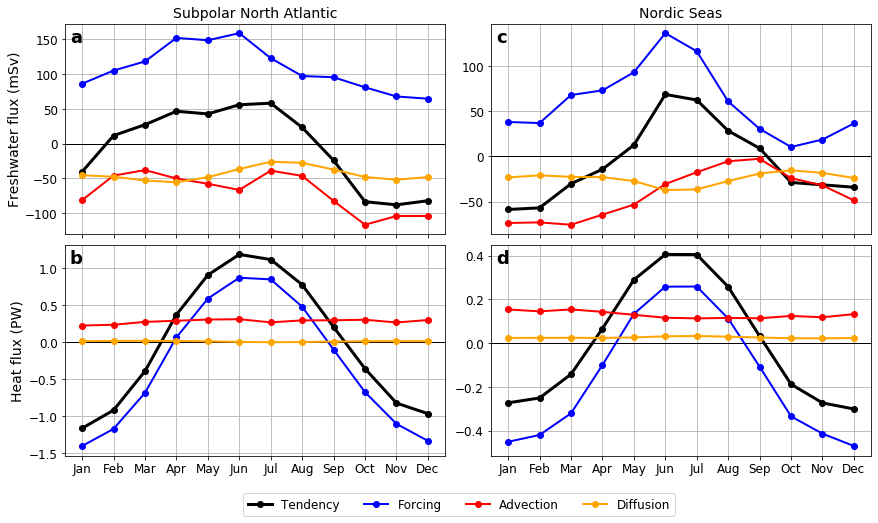

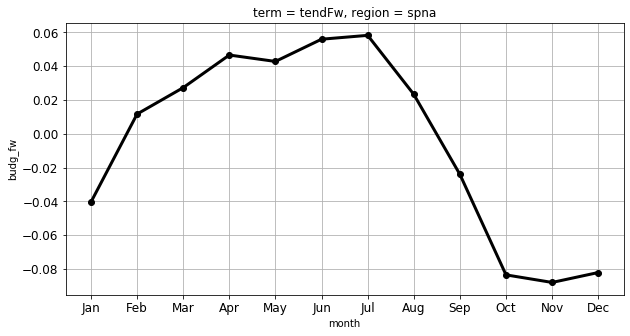

In [38]:
budgFw_clim.sel(region='spna',term='tendFw').plot(lw=3, color='k', marker='.',ms=12,figsize=(10,5))
plt.xticks(np.arange(1,13))
plt.setp(plt.gca(), 'xticklabels', calendar.month_abbr[1:13])
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.show()

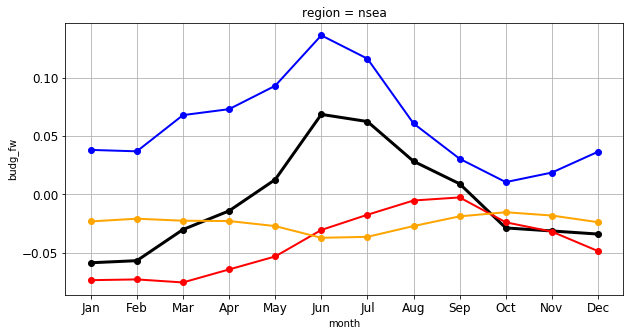

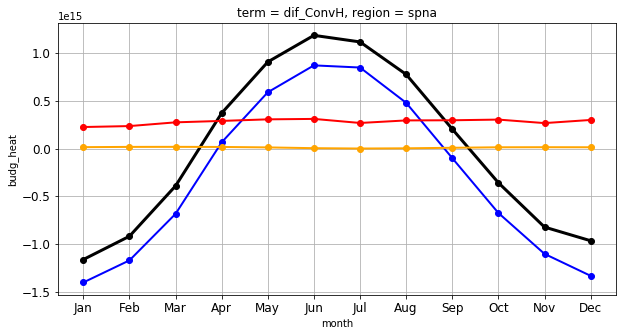

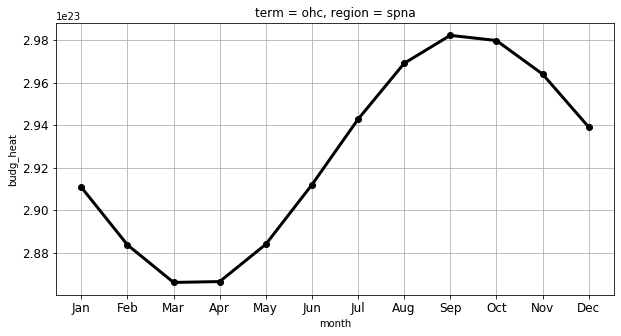

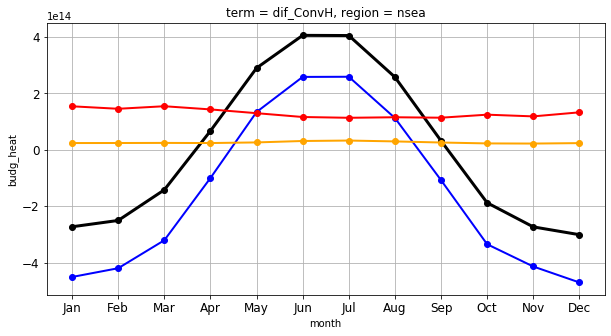